# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 4
Utilizando o dataset Heart Disease UCI (disponível no repositório da disciplina e em https://www.kaggle.com/ronitf/heart-disease-uci) construa uma arvore de decisão que classifique as amostras em saudáveis (coluna target =0) ou não.

Avalie a precisão, acurácia e mostre a árvore de decisão gerada.

* Existem um ou mais dados categóricos que precisam do devido tratamento.

Para exibir a arvore de decisão utilize os comandos:

-> Instale o graphviz disponível em:
https://graphviz.gitlab.io/_pages/Download/Download_windows.html

-> Na IDE:

from sklearn.externals.six import StringIO

from IPython.display import Image

from sklearn.tree import export_graphviz

import pydotplus

import os

os.environ['PATH'].split(os.pathsep)

os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

dot_data = StringIO()

export_graphviz(modeloTreinadoDT, out_file=dot_data,

    filled=True, rounded=True,
    feature_names = [vetor com o nome das features],
    class_names = [Saudável', ‘Doente'],
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [1]:
#Importando as bibliotecas. Se houver algum erro, use "pip install Libname"
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz, plot_tree
import pydotplus

In [2]:
#Leitura do dataset .csv

#Lembrar que a origem da dataset é uma variável.
#Neste caso é proveniente da pasta de datasets do Github: https://github.com/fiapIA/modelos_de_ia_e_ml/data

dataset = pd.read_csv('data/4_heart.csv', sep=',', engine='python', error_bad_lines=False)

#Visualização das 10 primeiras linhas do dataset
dataset.head(10)

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Descrição das colunas do dataset:

##### CP tipo de dor no peito
##### trestbps pressão sanguinea 
##### chol colesterol
##### fbs açucar no sangue em jejum
##### restecg eletrocardio
##### thalach batimento cardiaco máximo
##### exang angina induzida por exercício
##### oldpeak Depressão ST induzida por exercício em relação ao repouso
##### slope a inclinação do segmento ST do pico do exercício
##### ca numeros de vasos principais
##### thal 3 = normal; 6 = fixed defect; 7 = reversable defect
##### target saudavel (o) ou não (1)

## Analisando a descrição das variáveis, não iremos excluir nenhuma

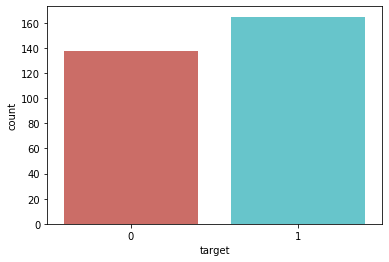

In [3]:
# Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.

sb.countplot(x='target',data=dataset, palette='hls')

In [4]:
# Verificando se tem dados nulos, para limpeza

dataset.isnull().sum()

ï»¿age      0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Informações gerais do dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿age    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Não há dados nulos para fazer drop no dataset

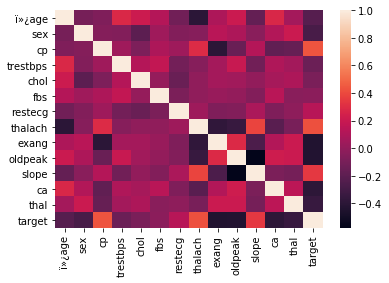

In [6]:
# Validando independencia entre as variáveis
sb.heatmap(dataset.corr())  

## Não há correlação forte entre as variáveis explicativas. Assim, não excluíremos nenhuma variável

In [7]:
# 1º: Separar o conjunto em variável resposta e variáveis de treinamento

X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = dataset.iloc[:,13].values

In [8]:
# Agora dividir em treino e teste (teste com 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [9]:
classificador = DecisionTreeClassifier()
classificador.fit(X_train, y_train)        #rodar o modelo
y_pred = classificador.predict(X_test)     #obter o Y predito dado o x teste

In [10]:
cm = confusion_matrix(y_test, y_pred)      #matriz de confusão
print(cm)

[[31  9]
 [12 39]]


In [11]:
print(metrics.accuracy_score(y_test, y_pred))   #avaliar a acuracia

0.7692307692307693


In [12]:
print(classification_report(y_test, y_pred))  #avaliar a classificação, principalmente o RECALL 

precision    recall  f1-score   support

           0       0.72      0.78      0.75        40
           1       0.81      0.76      0.79        51

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



[Text(175.37142857142857, 203.85, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = Não Saudável'),
 Text(93.66428571428571, 176.67000000000002, 'ca <= 0.5\ngini = 0.367\nsamples = 99\nvalue = [75, 24]\nclass = Saudável'),
 Text(59.785714285714285, 149.49, 'thal <= 2.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21]\nclass = Saudável'),
 Text(31.885714285714286, 122.31, 'thalach <= 145.5\ngini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = Não Saudável'),
 Text(15.942857142857143, 95.13, 'trestbps <= 116.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Saudável'),
 Text(7.9714285714285715, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Não Saudável'),
 Text(23.914285714285715, 67.94999999999999, 'slope <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Saudável'),
 Text(15.942857142857143, 40.77000000000001, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Saudável'),
 Text(31.885714285714286, 40.77000000000001, 'gini = 0.0\nsamples 

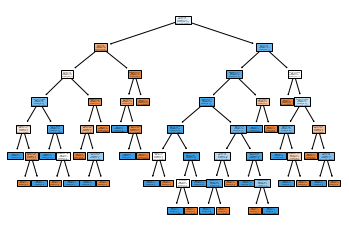

In [13]:
# Exportação com o plot_tree
plot_tree(classificador, filled=True, feature_names =  dataset.columns.values, class_names = ['Saudável', 'Não Saudável'])

## Pelo plot acima, há indícios de uma árvore muito grande. Por isso é necessário avaliar outras características.

In [14]:
#Gerando a Arvore de decisão com 4 nós folha
classificador = DecisionTreeClassifier(max_leaf_nodes  = 4)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)      #matriz de confusão
print(cm)

[[26 14]
 [ 5 46]]


In [16]:
print(metrics.accuracy_score(y_test, y_pred))   #avaliar a acuracia

0.7912087912087912


In [17]:
print(classification_report(y_test, y_pred))  #avaliar a classificação, principalmente o RECALL 

precision    recall  f1-score   support

           0       0.84      0.65      0.73        40
           1       0.77      0.90      0.83        51

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



[Text(223.20000000000002, 190.26, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = Não Saudável'),
 Text(167.4, 135.9, 'ca <= 0.5\ngini = 0.367\nsamples = 99\nvalue = [75, 24]\nclass = Saudável'),
 Text(111.60000000000001, 81.53999999999999, 'thal <= 2.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21]\nclass = Saudável'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = Não Saudável'),
 Text(167.4, 27.180000000000007, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = Saudável'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.103\nsamples = 55\nvalue = [52, 3]\nclass = Saudável'),
 Text(279.0, 135.9, 'gini = 0.324\nsamples = 113\nvalue = [23, 90]\nclass = Não Saudável')]

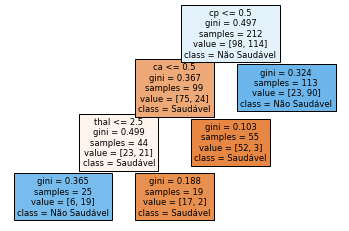

In [18]:
# Exportação com o plot_tree
plot_tree(classificador, filled=True, feature_names =  dataset.columns.values, class_names = ['Saudável', 'Não Saudável'])

## A acurácia aumentou para 79. Apesar da precisão para 0 e 1 e recall para 1 terem aumentado, o recall para 0 reduziu. Vamos avaliar com 5 nós folha

In [19]:
#Gerando a Arvore de decisão com apenas 5 nós folha
classificador = DecisionTreeClassifier(max_leaf_nodes  = 5)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [20]:
print(metrics.accuracy_score(y_test, y_pred))   #avaliar a acuracia
print(classification_report(y_test, y_pred))  #avaliar a classificação, principalmente o RECALL 
cm = confusion_matrix(y_test, y_pred)      #matriz de confusão
print(cm)

0.7582417582417582
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        40
           1       0.81      0.75      0.78        51

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

[[31  9]
 [13 38]]


[Text(186.0, 190.26, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = Não Saudável'),
 Text(111.60000000000001, 135.9, 'ca <= 0.5\ngini = 0.367\nsamples = 99\nvalue = [75, 24]\nclass = Saudável'),
 Text(74.4, 81.53999999999999, 'thal <= 2.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21]\nclass = Saudável'),
 Text(37.2, 27.180000000000007, 'gini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = Não Saudável'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = Saudável'),
 Text(148.8, 81.53999999999999, 'gini = 0.103\nsamples = 55\nvalue = [52, 3]\nclass = Saudável'),
 Text(260.40000000000003, 135.9, 'thal <= 2.5\ngini = 0.324\nsamples = 113\nvalue = [23, 90]\nclass = Não Saudável'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.203\nsamples = 87\nvalue = [10, 77]\nclass = Não Saudável'),
 Text(297.6, 81.53999999999999, 'gini = 0.5\nsamples = 26\nvalue = [13, 13]\nclass = Saudável')]

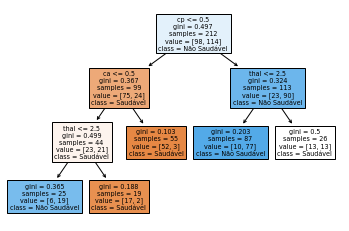

In [21]:
# Exportação com o plot_tree
plot_tree(classificador, filled=True, feature_names =  dataset.columns.values, class_names = ['Saudável', 'Não Saudável'])

In [22]:
#Criação da Árvore de decisão com 5 níveis de profundidade
classificador = DecisionTreeClassifier(max_depth  = 5)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [23]:
print(metrics.accuracy_score(y_test, y_pred))   #avaliar a acuracia
print(classification_report(y_test, y_pred))  #avaliar a classificação, principalmente o RECALL 
cm = confusion_matrix(y_test, y_pred)      #matriz de confusão
print(cm)

0.7582417582417582
              precision    recall  f1-score   support

           0       0.72      0.72      0.73        40
           1       0.78      0.78      0.78        51

    accuracy                           0.76        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29 11]
 [11 40]]


[Text(183.675, 199.32, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = Não Saudável'),
 Text(109.275, 163.07999999999998, 'ca <= 0.5\ngini = 0.367\nsamples = 99\nvalue = [75, 24]\nclass = Saudável'),
 Text(69.75, 126.83999999999999, 'thal <= 2.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21]\nclass = Saudável'),
 Text(37.2, 90.6, 'thalach <= 145.5\ngini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = Não Saudável'),
 Text(18.6, 54.359999999999985, 'trestbps <= 116.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Saudável'),
 Text(9.3, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Não Saudável'),
 Text(27.900000000000002, 18.119999999999976, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Saudável'),
 Text(55.800000000000004, 54.359999999999985, 'chol <= 327.5\ngini = 0.117\nsamples = 16\nvalue = [1, 15]\nclass = Não Saudável'),
 Text(46.5, 18.119999999999976, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Não Saudável'),
 Text(65

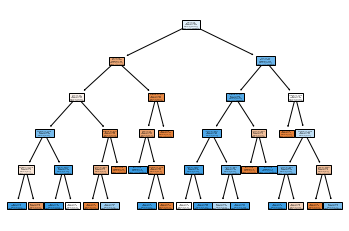

In [24]:
# Exportação com o plot_tree
plot_tree(classificador, filled=True, feature_names =  dataset.columns.values, class_names = ['Saudável', 'Não Saudável'])

## A árvore ficou grande e ainda com acurácia menor (~77). Reduzindo a profundidade para 4

In [25]:
#Criação da Árvore de decisão com 4 níveis de profundidade
classificador = DecisionTreeClassifier(max_depth  = 4)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [26]:
print(metrics.accuracy_score(y_test, y_pred))   #avaliar a acuracia
print(classification_report(y_test, y_pred))  #avaliar a classificação, principalmente o RECALL 
cm = confusion_matrix(y_test, y_pred)      #matriz de confusão
print(cm)

0.7142857142857143
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        40
           1       0.76      0.73      0.74        51

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91

[[28 12]
 [14 37]]


[Text(181.35000000000002, 195.696, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = Não Saudável'),
 Text(104.62500000000001, 152.208, 'ca <= 0.5\ngini = 0.367\nsamples = 99\nvalue = [75, 24]\nclass = Saudável'),
 Text(55.800000000000004, 108.72, 'thal <= 2.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21]\nclass = Saudável'),
 Text(27.900000000000002, 65.232, 'thalach <= 145.5\ngini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = Não Saudável'),
 Text(13.950000000000001, 21.744, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Saudável'),
 Text(41.85, 21.744, 'gini = 0.117\nsamples = 16\nvalue = [1, 15]\nclass = Não Saudável'),
 Text(83.7, 65.232, 'oldpeak <= 0.65\ngini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = Saudável'),
 Text(69.75, 21.744, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Saudável'),
 Text(97.65, 21.744, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = Saudável'),
 Text(153.45000000000002, 108.72, 'oldpeak <= 0.6\ngini = 0.103\nsampl

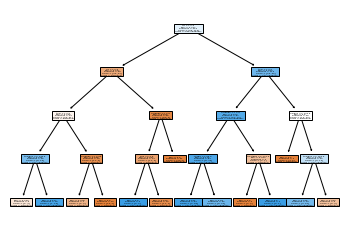

In [27]:
# Exportação com o plot_tree
plot_tree(classificador, filled=True, feature_names =  dataset.columns.values, class_names = ['Saudável', 'Não Saudável'])

## A acurácia piorou. Vamos testar com 3 de profundidade

In [28]:
#Criação da Árvore de decisão com 3 níveis de profundidade
classificador = DecisionTreeClassifier(max_depth  = 3)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [29]:
print(metrics.accuracy_score(y_test, y_pred))   #avaliar a acuracia
print(classification_report(y_test, y_pred))  #avaliar a classificação, principalmente o RECALL 
cm = confusion_matrix(y_test, y_pred)      #matriz de confusão
print(cm)

0.8021978021978022
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        40
           1       0.79      0.88      0.83        51

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91

[[28 12]
 [ 6 45]]


[Text(167.4, 190.26, 'cp <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]\nclass = Não Saudável'),
 Text(83.7, 135.9, 'ca <= 0.5\ngini = 0.367\nsamples = 99\nvalue = [75, 24]\nclass = Saudável'),
 Text(41.85, 81.53999999999999, 'thal <= 2.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21]\nclass = Saudável'),
 Text(20.925, 27.180000000000007, 'gini = 0.365\nsamples = 25\nvalue = [6, 19]\nclass = Não Saudável'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = Saudável'),
 Text(125.55000000000001, 81.53999999999999, 'oldpeak <= 0.6\ngini = 0.103\nsamples = 55\nvalue = [52, 3]\nclass = Saudável'),
 Text(104.625, 27.180000000000007, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]\nclass = Saudável'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]\nclass = Saudável'),
 Text(251.10000000000002, 135.9, 'thal <= 2.5\ngini = 0.324\nsamples = 113\nvalue = [23, 90]\nclass = Não Saudável'),
 Text(209.25, 81.53999999

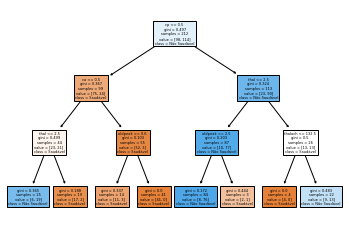

In [30]:
# Exportação com o plot_tree
plot_tree(classificador, filled=True, feature_names =  dataset.columns.values, class_names = ['Saudável', 'Não Saudável'])

## A alteração trouxe um resultado positivo. Com uma boa acurácia, precisão e recall, além de ser uma árvore passível de análise, pois não é muito complexa

In [31]:
#Criação da Árvore de decisão com 2 níveis de profundidade
classificador = DecisionTreeClassifier(max_depth  = 2)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [32]:
print(metrics.accuracy_score(y_test, y_pred))   #avaliar a acuracia
print(classification_report(y_test, y_pred))  #avaliar a classificação, principalmente o RECALL 
cm = confusion_matrix(y_test, y_pred)      #matriz de confusão
print(cm)

0.6813186813186813
              precision    recall  f1-score   support

           0       0.60      0.85      0.70        40
           1       0.82      0.55      0.66        51

    accuracy                           0.68        91
   macro avg       0.71      0.70      0.68        91
weighted avg       0.72      0.68      0.68        91

[[34  6]
 [23 28]]


## Neste teste com 2 de profundidade, a acurácia caiu e há um erro significativo na previsão do saudável (0), identificado na matriz de confusão

# Conclusão: Melhor modelo foi com 3 níveis de profundidade para esse dataset